# PGE Load Profile Data

| Metadata | Value |
| -------- | ----- |
| Title    | PG&E Load Profile Data Loader
| Author   | David P. Chassin (dchassin@slac.stanford.edu)

In [1]:
from datetime import datetime
print(datetime.now().strftime("Last updated: %m/%d/%Y"))

Last updated: 06/01/2020


PG&E provides access to historical load data broken down by customer tariff. The data can obtained directly from their [Load Profile Archive](https://www.pge.com/en_US/for-our-business-partners/retail-energy-suppliers/electric-service-provider-resource-center/mads/mads-load-profiles.page).  This notebook pulls the data for the last 28 days and plots the individual tariff and total loads.

## Loading data

The following loads the data from the PG&E data portal, reports which tariffs (columns) are available, and reports how much data was collected. According to PG&E's load profile archive, since July 2016 some tariffs columns are redundant and continue to be reported for backward compatibility with legacy tools.  These changes are:

1. Beginning with trade date 8/1/2016, which will be posted on MADS.PGE.COM on or before 8/8/2016, PG&E will consolidate the current standby DLP profiles (S1S, S1M, S9M, S19, S20) into one standby profile called STBY.  To allow stakeholders to update their systems, in addition to posting the consolidated standby profile STBY, PG&E will continue to post S1S, S1M, S9M, S19, S20 profiles with the same information as profile STBY until further notice.

2. PG&E received feedback from stakeholders indicating that the change in name from E1 to RES would affect their current processes.  In order to allow for more time to update these processes, PG&E will post the same profile with two different labels, E1 and RES, until further notice. 

3. Beginning with trade date June 1, 2016 which will be posted to MADS.PGE.COM on or before June 8, 2016, PG&E will implement the following change:  There will be one residential dynamic load profile instead of two.  Profile RES will replace profiles E1 and E7. 

Consequently, the affected columns are deleted in the data loaded from PG&E's archive.

The following cell sets how far back the data goes.

In [2]:
Ndays = 92 # roughly 3 months

In [3]:
# load PG&E data from the load profile archive
import pgande
from datetime import timedelta

length = timedelta(days=Ndays)
stop = datetime.now().strftime('%m/%d/%y')
start = (datetime.now()-length).strftime('%m/%d/%y')

data = pgande.get_loads(start,stop)

# drop columns that are redundant (see above)
data.drop(columns=["E1","S19","S1M","S1S","S20","S9M"],inplace=True)

ERROR: get_load_profile(date=2020-05-27 00:00:00): no data
ERROR: get_load_profile(date=2020-05-28 00:00:00): no data
ERROR: get_load_profile(date=2020-05-29 00:00:00): no data
ERROR: get_load_profile(date=2020-05-30 00:00:00): no data
ERROR: get_load_profile(date=2020-05-31 00:00:00): no data
ERROR: get_load_profile(date=2020-06-01 00:00:00): no data


In [4]:
# report results
print('Tariffs......',','.join(list(data.columns)))
print('Rows.........',data.shape[0])
print('First date...',data.index.min().strftime('%m/%d/%y'))
print('Last date....',data.index.max().strftime('%m/%d/%y'))

Tariffs...... A1,A10,A6,E19P,E19S,E19V,E20P,E20S,E20T,RES,STBY
Rows......... 4176
First date... 03/01/20
Last date.... 05/26/20


## Load profile breakdown

The following plots the breakdown of the load profile data for all the active tariffs. 

In [5]:
data.plot(figsize=(18,8),grid=True)
print("Figure 1: PG&E Load Profile composition by tariff")

Figure 1: PG&E Load Profile composition by tariff


The following plots the total load profile for PG&E with all the active tariffs combined.

Figure 2: Total PG&E load profile


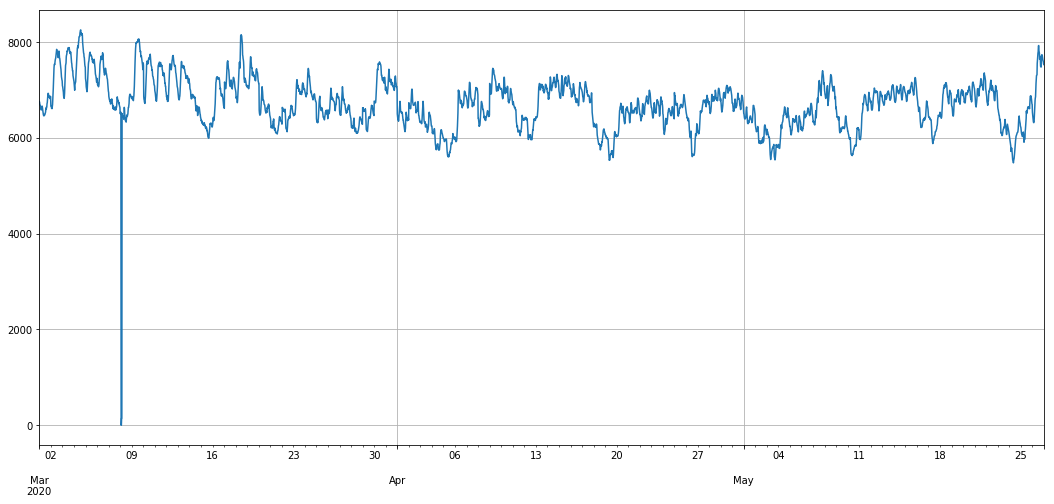

In [6]:
data.sum(axis=1).plot(figsize=(18,8),grid=True)
print("Figure 2: Total PG&E load profile")